In [1]:
from importlib import reload
import seaborn as sns
from scipy.stats import ks_2samp
from DEPENDENCIES.input_class import Input
from DEPENDENCIES.constants import *
import DEPENDENCIES.plot_generic_data as pgd
import DEPENDENCIES.processing as proc
import DEPENDENCIES.plot_performance as pp
import DEPENDENCIES.tree_classification as tc
import sys

C:\Users\fsebastian\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2]:
SIM = ["31","32","33"]
METRIC = "Weighted_fraction" #Bye_time, Bound_fraction, Weighted_fraction
MODE = "Sensspec"
inp = Input(SIM, METRIC, MODE)

In [3]:
times, DATA = proc.import_MD_data(inp.sim, inp.dist_suffix, DATA)
inp.update_metric_params(times, DATA, 6) #6 is theta in the weighting function

(3, 31, 2501, 10)


In [4]:
acc, sens, spec = proc.metric_gridsearch(inp.i_space, inp.j_space, inp.metric, data=DATA, metric_params=inp.metric_params)
best_ndxs = proc.choose_best_param_ndx(acc, sens, spec, opt_criter=inp.opt_criter, decide_criter=inp.decide_criter)
best_i, best_j = inp.i_space[best_ndxs[0]], inp.j_space[best_ndxs[1]]
print("Best eta factor: {:.2f}".format(best_i))
print("Best scoring threshold: {:.2f}".format(best_j))
DATA['Score'] = proc.evaluate_metric(inp.metric, best_i, inp.metric_params)
bind_scores = np.array(list(DATA.Score[DATA.Active==True].values)).flatten()
unbind_scores = np.array(list(DATA.Score[DATA.Active==False].values)).flatten()
ks, p_val = ks_2samp(bind_scores, unbind_scores)
print("Probability of having the same distribution for both classes: {:.2E}".format(p_val))

Equivalent (i,j) solutions:  [(49, 23)]
Chosen indeces: (49,23)
Accuracy at best point: 0.84
Sensitivity at best point: 0.95
Specificity at best point: 0.56
Best eta factor: 2.32
Best scoring threshold: 0.23
Probability of having the same distribution for both classes: 2.82E-40


In [5]:
DATA

,Nanoparticle,Analyte,Act_Mean,Act_Std,Act_Rank,Act_Rank_Std_up,Act_Rank_Std_down,Act_log,Act_log_error_up,Act_log_error_down,Color,Active,Distances,Rogs,Rog_Mean,Rog_Std,Sasas,Sasa_Mean,Sasa_Std,Score
System,,,,,,,,,,,,,,,,,,,,
N8A20,8,20,0.0,0.0,30,0,8,0.000000,0.000000,0.000000,"[0.5, 0.0, 1.0, 1.0]",False,"[[1.74, 1.73, 1.724, 1.706, 1.695, 1.779, 1.85...","[1.5078466666666666, 1.5060399999999998, 1.504...",1.222270,0.027839,"[320.497, 321.464, 321.0106666666666, 320.458,...",117.607711,15.795436,"[0.18748100997052214, 0.22872760800354883, 0.2..."
N14A20,14,20,0.0,0.0,29,1,7,0.000000,0.000000,0.000000,"[0.44, 0.1, 1.0, 1.0]",False,"[[1.807, 1.842, 1.756, 1.78, 1.752, 1.852, 1.8...","[1.5088033333333335, 1.49904, 1.49668666666666...",1.229346,0.027451,"[319.55333333333334, 315.6013333333333, 316.58...",122.534396,14.510300,"[0.20580458873999932, 0.06044164941643959, 0.2..."
N9A20,9,20,0.0,0.0,28,2,6,0.000000,0.000000,0.000000,"[0.37, 0.21, 0.99, 1.0]",False,"[[1.818, 1.721, 1.843, 1.815, 1.803, 1.774, 1....","[1.5028100000000002, 1.4987700000000002, 1.496...",1.234890,0.029910,"[318.4013333333333, 318.213, 317.2496666666666...",131.365727,17.004910,"[0.19847025029734564, 0.2912432035739319, 0.27..."
N6A21,6,21,0.0,0.0,27,3,5,0.000000,0.000000,0.000000,"[0.3, 0.3, 0.99, 1.0]",False,"[[1.734, 1.767, 1.751, 1.78, 1.761, 1.792, 1.7...","[1.4675, 1.46032, 1.4581833333333332, 1.457193...",1.196819,0.024595,"[307.084, 304.90833333333336, 303.821333333333...",113.183837,14.111117,"[0.2840220728514455, 0.26203393734624714, 0.14..."
N1A16,1,16,0.0,0.0,26,4,4,0.000000,0.000000,0.000000,"[0.23, 0.41, 0.98, 1.0]",False,"[[1.476, 1.505, 1.468, 1.507, 1.487, 1.476, 1....","[1.27757, 1.2739199999999997, 1.27326333333333...",1.154348,0.012843,"[216.70766666666668, 214.62033333333338, 213.8...",111.985301,3.915726,"[0.42105878831744814, 0.4599308921239854, 0.41..."
N1A17,1,17,0.0,0.0,25,5,3,0.000000,0.000000,0.000000,"[0.17, 0.49, 0.97, 1.0]",False,"[[1.545, 1.484, 1.492, 1.516, 1.488, 1.499, 1....","[1.2798766666666666, 1.2752000000000001, 1.274...",1.159722,0.010505,"[218.39866666666668, 214.76999999999998, 214.7...",113.355325,4.156996,"[0.2709859749135972, 0.1547502762126302, 0.241..."
N3A10,3,10,0.0,0.0,24,6,2,0.000000,0.000000,0.000000,"[0.1, 0.59, 0.95, 1.0]",False,"[[1.603, 1.517, 1.561, 1.552, 1.602, 1.52, 1.5...","[1.4070566666666666, 1.4023566666666667, 1.401...",1.258189,0.019399,"[245.6933333333333, 239.215, 240.129, 239.4446...",129.563886,7.546669,"[0.7798274823257692, 0.8065543700695904, 0.797..."
N3A11,3,11,0.0,0.0,23,7,1,0.000000,0.000000,0.000000,"[0.04, 0.66, 0.93, 1.0]",False,"[[1.587, 1.557, 1.525, 1.537, 1.536, 1.516, 1....","[1.4070966666666667, 1.4014033333333333, 1.400...",1.257991,0.014636,"[246.49833333333333, 241.28866666666667, 242.1...",131.776913,6.009669,"[0.7944301407327966, 0.7862390781180763, 0.794..."
N3A18,3,18,0.0,0.0,22,8,0,0.000000,0.000000,0.000000,"[0.03, 0.74, 0.91, 1.0]",False,"[[1.541, 1.54, 1.539, 1.579, 1.517, 1.559, 1.5...","[1.4065366666666668, 1.4023333333333332, 1.401...",1.255919,0.016586,"[246.54466666666667, 240.76333333333332, 241.1...",131.478612,6.628653,"[0.8183281412293502, 0.8331854607645341, 0.834..."


In [6]:
np.set_printoptions(threshold=100)
DATA.drop(['Distances','Rogs','Sasas'], axis=1).to_csv("S"+SIM[0]+"/"+METRIC+"/DATA.csv")
np.set_printoptions(threshold=10)

# Dataset

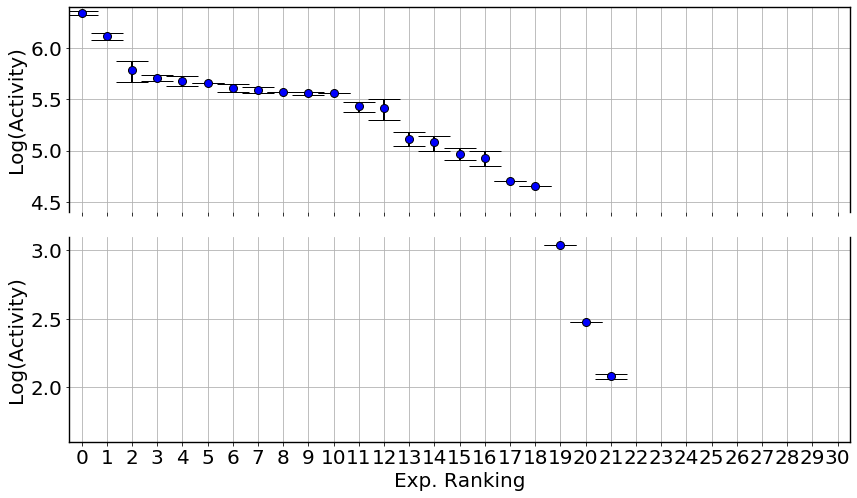

In [7]:
pgd.plot_experimental_logK()

In [8]:
DATA[['Act_Mean', 'Act_Rank', 'Act_Rank_Std_up', 'Act_Rank_Std_down', 'Act_log', 'Act_log_error_up', 'Act_log_error_down', 'Active']]

,Act_Mean,Act_Rank,Act_Rank_Std_up,Act_Rank_Std_down,Act_log,Act_log_error_up,Act_log_error_down,Active
System,,,,,,,,
N8A20,0.0,30,0,8,0.000000,0.000000,0.000000,False
N14A20,0.0,29,1,7,0.000000,0.000000,0.000000,False
N9A20,0.0,28,2,6,0.000000,0.000000,0.000000,False
N6A21,0.0,27,3,5,0.000000,0.000000,0.000000,False
N1A16,0.0,26,4,4,0.000000,0.000000,0.000000,False
N1A17,0.0,25,5,3,0.000000,0.000000,0.000000,False
N3A10,0.0,24,6,2,0.000000,0.000000,0.000000,False
N3A11,0.0,23,7,1,0.000000,0.000000,0.000000,False
N3A18,0.0,22,8,0,0.000000,0.000000,0.000000,False


In [9]:
DATA

,Nanoparticle,Analyte,Act_Mean,Act_Std,Act_Rank,Act_Rank_Std_up,Act_Rank_Std_down,Act_log,Act_log_error_up,Act_log_error_down,Color,Active,Distances,Rogs,Rog_Mean,Rog_Std,Sasas,Sasa_Mean,Sasa_Std,Score
System,,,,,,,,,,,,,,,,,,,,
N8A20,8,20,0.0,0.0,30,0,8,0.000000,0.000000,0.000000,"[0.5, 0.0, 1.0, 1.0]",False,"[[1.74, 1.73, 1.724, 1.706, 1.695, 1.779, 1.85...","[1.5078466666666666, 1.5060399999999998, 1.504...",1.222270,0.027839,"[320.497, 321.464, 321.0106666666666, 320.458,...",117.607711,15.795436,"[0.18748100997052214, 0.22872760800354883, 0.2..."
N14A20,14,20,0.0,0.0,29,1,7,0.000000,0.000000,0.000000,"[0.44, 0.1, 1.0, 1.0]",False,"[[1.807, 1.842, 1.756, 1.78, 1.752, 1.852, 1.8...","[1.5088033333333335, 1.49904, 1.49668666666666...",1.229346,0.027451,"[319.55333333333334, 315.6013333333333, 316.58...",122.534396,14.510300,"[0.20580458873999932, 0.06044164941643959, 0.2..."
N9A20,9,20,0.0,0.0,28,2,6,0.000000,0.000000,0.000000,"[0.37, 0.21, 0.99, 1.0]",False,"[[1.818, 1.721, 1.843, 1.815, 1.803, 1.774, 1....","[1.5028100000000002, 1.4987700000000002, 1.496...",1.234890,0.029910,"[318.4013333333333, 318.213, 317.2496666666666...",131.365727,17.004910,"[0.19847025029734564, 0.2912432035739319, 0.27..."
N6A21,6,21,0.0,0.0,27,3,5,0.000000,0.000000,0.000000,"[0.3, 0.3, 0.99, 1.0]",False,"[[1.734, 1.767, 1.751, 1.78, 1.761, 1.792, 1.7...","[1.4675, 1.46032, 1.4581833333333332, 1.457193...",1.196819,0.024595,"[307.084, 304.90833333333336, 303.821333333333...",113.183837,14.111117,"[0.2840220728514455, 0.26203393734624714, 0.14..."
N1A16,1,16,0.0,0.0,26,4,4,0.000000,0.000000,0.000000,"[0.23, 0.41, 0.98, 1.0]",False,"[[1.476, 1.505, 1.468, 1.507, 1.487, 1.476, 1....","[1.27757, 1.2739199999999997, 1.27326333333333...",1.154348,0.012843,"[216.70766666666668, 214.62033333333338, 213.8...",111.985301,3.915726,"[0.42105878831744814, 0.4599308921239854, 0.41..."
N1A17,1,17,0.0,0.0,25,5,3,0.000000,0.000000,0.000000,"[0.17, 0.49, 0.97, 1.0]",False,"[[1.545, 1.484, 1.492, 1.516, 1.488, 1.499, 1....","[1.2798766666666666, 1.2752000000000001, 1.274...",1.159722,0.010505,"[218.39866666666668, 214.76999999999998, 214.7...",113.355325,4.156996,"[0.2709859749135972, 0.1547502762126302, 0.241..."
N3A10,3,10,0.0,0.0,24,6,2,0.000000,0.000000,0.000000,"[0.1, 0.59, 0.95, 1.0]",False,"[[1.603, 1.517, 1.561, 1.552, 1.602, 1.52, 1.5...","[1.4070566666666666, 1.4023566666666667, 1.401...",1.258189,0.019399,"[245.6933333333333, 239.215, 240.129, 239.4446...",129.563886,7.546669,"[0.7798274823257692, 0.8065543700695904, 0.797..."
N3A11,3,11,0.0,0.0,23,7,1,0.000000,0.000000,0.000000,"[0.04, 0.66, 0.93, 1.0]",False,"[[1.587, 1.557, 1.525, 1.537, 1.536, 1.516, 1....","[1.4070966666666667, 1.4014033333333333, 1.400...",1.257991,0.014636,"[246.49833333333333, 241.28866666666667, 242.1...",131.776913,6.009669,"[0.7944301407327966, 0.7862390781180763, 0.794..."
N3A18,3,18,0.0,0.0,22,8,0,0.000000,0.000000,0.000000,"[0.03, 0.74, 0.91, 1.0]",False,"[[1.541, 1.54, 1.539, 1.579, 1.517, 1.559, 1.5...","[1.4065366666666668, 1.4023333333333332, 1.401...",1.255919,0.016586,"[246.54466666666667, 240.76333333333332, 241.1...",131.478612,6.628653,"[0.8183281412293502, 0.8331854607645341, 0.834..."


# Ragius of gyration

In [10]:
#pgd.plot_all_rog(times, DATA, kwargs=inp.kwargs_rogs)
#pgd.plot_rog_byact(DATA)
#pgd.plot_rog_bynp(DATA)

# Sasa

In [11]:
#pgd.plot_all_sasa(times, DATA, kwargs=inp.kwargs_sasas)
#pgd.plot_sasa_byact(DATA)
#pgd.plot_sasa_bynp(DATA)

# Parameter search

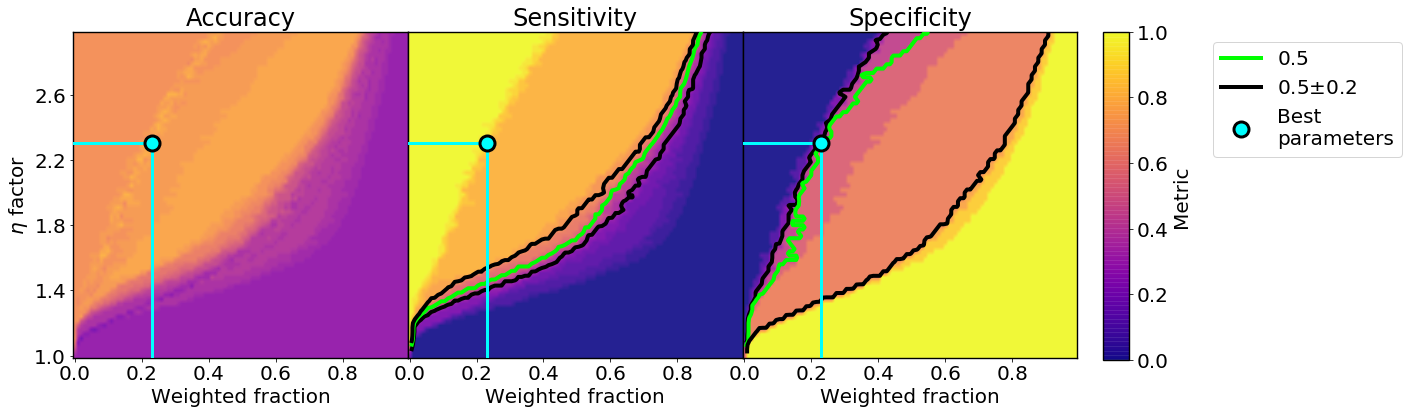

In [12]:
pp.plot_metric_performance(acc, sens, spec, best_ndxs, kwargs=inp.kwargs_paramsearch)

# Performance

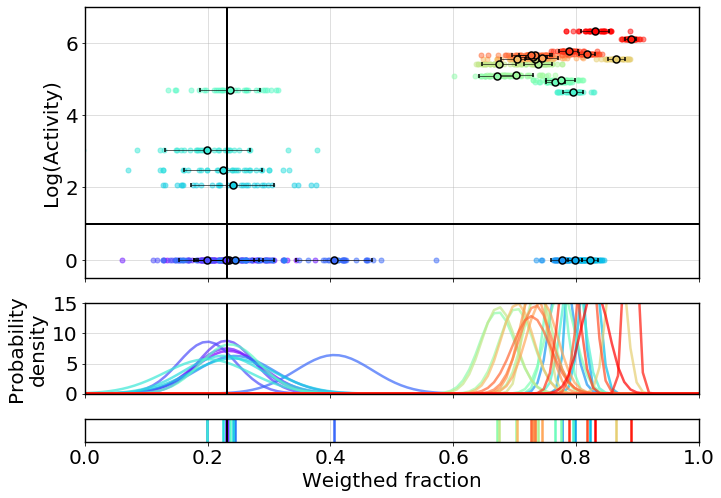

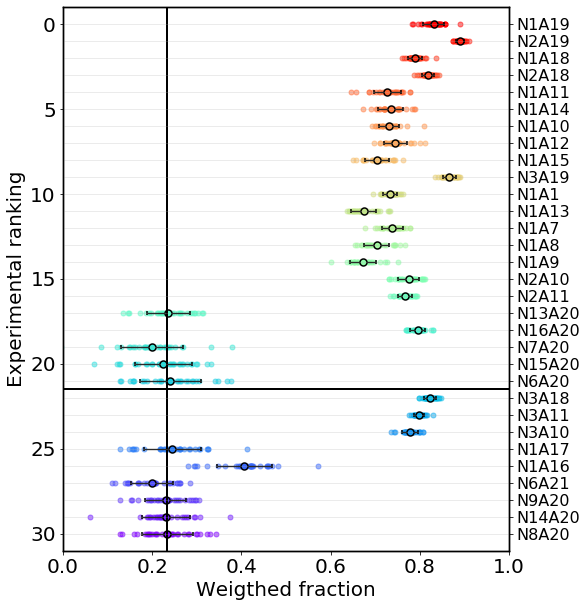

In [13]:
pp.plot_score_distribution(best_j, inp.j_space, data=DATA, kwargs=inp.kwargs)
pp.plot_score_rank(best_j, inp.j_space, data=DATA, kwargs=inp.kwargs)

## _True positives_

In [14]:
proc.true_positives(best_j, DATA)

,Nanoparticle,Analyte,Act_Mean,Act_Std,Act_Rank,Act_Rank_Std_up,Act_Rank_Std_down,Act_log,Act_log_error_up,Act_log_error_down,Color,Active,Distances,Rogs,Rog_Mean,Rog_Std,Sasas,Sasa_Mean,Sasa_Std,Score
System,,,,,,,,,,,,,,,,,,,,
N6A20,6,20,120.0,5.0,21,0,0,2.079181,0.017729,0.018483,"[0.1, 0.81, 0.89, 1.0]",True,"[[1.756, 1.742, 1.731, 1.724, 1.77, 1.744, 1.8...","[1.4674333333333334, 1.4618399999999998, 1.459...",1.201595,0.024455,"[307.396, 302.94733333333335, 302.556333333333...",116.258667,12.870453,"[0.17680281743518061, 0.12763624966602824, 0.2..."
N16A20,16,20,45000.0,0.0,18,0,0,4.653213,0.000000,0.000000,"[0.3, 0.95, 0.81, 1.0]",True,"[[1.376, 1.388, 1.314, 1.301, 1.309, 1.426, 1....","[1.0110033333333333, 1.01054, 1.01007, 1.00993...",0.969766,0.003158,"[147.21533333333332, 142.94966666666667, 143.2...",104.998597,3.227860,"[0.8054575701833203, 0.7865500697383554, 0.789..."
N13A20,13,20,50000.0,0.0,17,0,0,4.698970,0.000000,0.000000,"[0.36, 0.98, 0.78, 1.0]",True,"[[1.869, 1.834, 1.783, 1.739, 1.752, 1.848, 1....","[1.53807, 1.53183, 1.5300500000000001, 1.52943...",1.262780,0.028174,"[324.78299999999996, 320.613, 320.868333333333...",124.395999,14.257293,"[0.1469109072969328, 0.1852601612158115, 0.197..."
N2A11,2,11,85000.0,15000.0,16,2,0,4.929419,0.070581,0.084321,"[0.43, 0.99, 0.74, 1.0]",True,"[[1.51, 1.556, 1.58, 1.532, 1.528, 1.59, 1.534...","[1.4094966666666668, 1.4064466666666668, 1.406...",1.252882,0.018337,"[243.946, 243.6483333333333, 244.242, 243.7686...",130.365037,5.999999,"[0.7531097086040068, 0.7689802834747715, 0.770..."
N2A10,2,10,93000.0,12000.0,15,1,1,4.968483,0.052706,0.059998,"[0.5, 1.0, 0.7, 1.0]",True,"[[1.527, 1.512, 1.548, 1.562, 1.538, 1.59, 1.5...","[1.4088133333333335, 1.4055100000000003, 1.404...",1.258166,0.015763,"[243.461, 241.028, 240.52566666666667, 240.438...",131.815600,5.025483,"[0.8072700794307601, 0.7442830675731739, 0.811..."
N1A9,1,9,120000.0,20000.0,14,1,2,5.079181,0.066947,0.079181,"[0.57, 0.99, 0.67, 1.0]",True,"[[1.54, 1.572, 1.436, 1.497, 1.489, 1.423, 1.4...","[1.2756866666666666, 1.2732466666666669, 1.272...",1.144860,0.012415,"[216.83633333333333, 213.68466666666666, 213.4...",111.771380,4.393401,"[0.6512501218079613, 0.657517530248707, 0.6442..."
N1A8,1,8,130000.0,20000.0,13,0,1,5.113943,0.062148,0.072551,"[0.64, 0.98, 0.63, 1.0]",True,"[[1.457, 1.542, 1.545, 1.473, 1.506, 1.438, 1....","[1.27593, 1.2732066666666666, 1.27323333333333...",1.144661,0.012349,"[216.87733333333333, 213.0466666666667, 213.37...",110.602739,3.545758,"[0.6551923433383959, 0.7086253925497786, 0.681..."
N1A7,1,7,260000.0,60000.0,12,1,0,5.414973,0.090177,0.113943,"[0.7, 0.95, 0.59, 1.0]",True,"[[1.575, 1.556, 1.468, 1.444, 1.428, 1.486, 1....","[1.2759866666666666, 1.27336, 1.27310000000000...",1.146448,0.011726,"[216.87166666666667, 213.05766666666668, 212.4...",115.121849,3.235029,"[0.7614379301171772, 0.7525028894139666, 0.761..."
N1A13,1,13,270000.0,30000.0,11,0,1,5.431364,0.045757,0.051153,"[0.77, 0.91, 0.54, 1.0]",True,"[[1.472, 1.5, 1.45, 1.46, 1.52, 1.498, 1.519, ...","[1.2755433333333333, 1.2727633333333335, 1.272...",1.151179,0.012765,"[216.9076666666667, 212.20466666666667, 212.06...",111.251337,4.232218,"[0.6601340618591288, 0.674035113640973, 0.7068..."


## _False positives_

In [15]:
proc.false_positives(best_j, data=DATA)

,Nanoparticle,Analyte,Act_Mean,Act_Std,Act_Rank,Act_Rank_Std_up,Act_Rank_Std_down,Act_log,Act_log_error_up,Act_log_error_down,Color,Active,Distances,Rogs,Rog_Mean,Rog_Std,Sasas,Sasa_Mean,Sasa_Std,Score
System,,,,,,,,,,,,,,,,,,,,
N8A20,8,20,0.0,0.0,30,0,8,0.0,0.0,0.0,"[0.5, 0.0, 1.0, 1.0]",False,"[[1.74, 1.73, 1.724, 1.706, 1.695, 1.779, 1.85...","[1.5078466666666666, 1.5060399999999998, 1.504...",1.222270,0.027839,"[320.497, 321.464, 321.0106666666666, 320.458,...",117.607711,15.795436,"[0.18748100997052214, 0.22872760800354883, 0.2..."
N1A16,1,16,0.0,0.0,26,4,4,0.0,0.0,0.0,"[0.23, 0.41, 0.98, 1.0]",False,"[[1.476, 1.505, 1.468, 1.507, 1.487, 1.476, 1....","[1.27757, 1.2739199999999997, 1.27326333333333...",1.154348,0.012843,"[216.70766666666668, 214.62033333333338, 213.8...",111.985301,3.915726,"[0.42105878831744814, 0.4599308921239854, 0.41..."
N1A17,1,17,0.0,0.0,25,5,3,0.0,0.0,0.0,"[0.17, 0.49, 0.97, 1.0]",False,"[[1.545, 1.484, 1.492, 1.516, 1.488, 1.499, 1....","[1.2798766666666666, 1.2752000000000001, 1.274...",1.159722,0.010505,"[218.39866666666668, 214.76999999999998, 214.7...",113.355325,4.156996,"[0.2709859749135972, 0.1547502762126302, 0.241..."
N3A10,3,10,0.0,0.0,24,6,2,0.0,0.0,0.0,"[0.1, 0.59, 0.95, 1.0]",False,"[[1.603, 1.517, 1.561, 1.552, 1.602, 1.52, 1.5...","[1.4070566666666666, 1.4023566666666667, 1.401...",1.258189,0.019399,"[245.6933333333333, 239.215, 240.129, 239.4446...",129.563886,7.546669,"[0.7798274823257692, 0.8065543700695904, 0.797..."
N3A11,3,11,0.0,0.0,23,7,1,0.0,0.0,0.0,"[0.04, 0.66, 0.93, 1.0]",False,"[[1.587, 1.557, 1.525, 1.537, 1.536, 1.516, 1....","[1.4070966666666667, 1.4014033333333333, 1.400...",1.257991,0.014636,"[246.49833333333333, 241.28866666666667, 242.1...",131.776913,6.009669,"[0.7944301407327966, 0.7862390781180763, 0.794..."
N3A18,3,18,0.0,0.0,22,8,0,0.0,0.0,0.0,"[0.03, 0.74, 0.91, 1.0]",False,"[[1.541, 1.54, 1.539, 1.579, 1.517, 1.559, 1.5...","[1.4065366666666668, 1.4023333333333332, 1.401...",1.255919,0.016586,"[246.54466666666667, 240.76333333333332, 241.1...",131.478612,6.628653,"[0.8183281412293502, 0.8331854607645341, 0.834..."


## _False negatives_

In [16]:
proc.false_negatives(best_j, data=DATA)

,Nanoparticle,Analyte,Act_Mean,Act_Std,Act_Rank,Act_Rank_Std_up,Act_Rank_Std_down,Act_log,Act_log_error_up,Act_log_error_down,Color,Active,Distances,Rogs,Rog_Mean,Rog_Std,Sasas,Sasa_Mean,Sasa_Std,Score
System,,,,,,,,,,,,,,,,,,,,
N15A20,15,20,300.0,0.0,20,0,0,2.477121,0.0,0.0,"[0.17, 0.87, 0.87, 1.0]",True,"[[1.792, 1.853, 1.766, 1.806, 1.745, 1.736, 1....","[1.4717533333333332, 1.4645566666666667, 1.462...",1.207360,0.029804,"[309.295, 305.512, 305.6143333333333, 305.2423...",118.237664,14.711973,"[0.2398614008059222, 0.26279647022083197, 0.28..."
N7A20,7,20,1100.0,0.0,19,0,0,3.041393,0.0,0.0,"[0.23, 0.91, 0.84, 1.0]",True,"[[1.781, 1.846, 1.759, 1.888, 1.838, 1.73, 1.8...","[1.52424, 1.5185666666666666, 1.51762666666666...",1.242766,0.025473,"[321.8956666666667, 320.86733333333336, 319.31...",127.295440,14.574233,"[0.1560870265572784, 0.2185084009746301, 0.200..."


## _True negatives_

In [17]:
proc.true_negatives(best_j, data=DATA)

,Nanoparticle,Analyte,Act_Mean,Act_Std,Act_Rank,Act_Rank_Std_up,Act_Rank_Std_down,Act_log,Act_log_error_up,Act_log_error_down,Color,Active,Distances,Rogs,Rog_Mean,Rog_Std,Sasas,Sasa_Mean,Sasa_Std,Score
System,,,,,,,,,,,,,,,,,,,,
N14A20,14,20,0.0,0.0,29,1,7,0.0,0.0,0.0,"[0.44, 0.1, 1.0, 1.0]",False,"[[1.807, 1.842, 1.756, 1.78, 1.752, 1.852, 1.8...","[1.5088033333333335, 1.49904, 1.49668666666666...",1.229346,0.027451,"[319.55333333333334, 315.6013333333333, 316.58...",122.534396,14.510300,"[0.20580458873999932, 0.06044164941643959, 0.2..."
N9A20,9,20,0.0,0.0,28,2,6,0.0,0.0,0.0,"[0.37, 0.21, 0.99, 1.0]",False,"[[1.818, 1.721, 1.843, 1.815, 1.803, 1.774, 1....","[1.5028100000000002, 1.4987700000000002, 1.496...",1.234890,0.029910,"[318.4013333333333, 318.213, 317.2496666666666...",131.365727,17.004910,"[0.19847025029734564, 0.2912432035739319, 0.27..."
N6A21,6,21,0.0,0.0,27,3,5,0.0,0.0,0.0,"[0.3, 0.3, 0.99, 1.0]",False,"[[1.734, 1.767, 1.751, 1.78, 1.761, 1.792, 1.7...","[1.4675, 1.46032, 1.4581833333333332, 1.457193...",1.196819,0.024595,"[307.084, 304.90833333333336, 303.821333333333...",113.183837,14.111117,"[0.2840220728514455, 0.26203393734624714, 0.14..."


# Nanoparticles

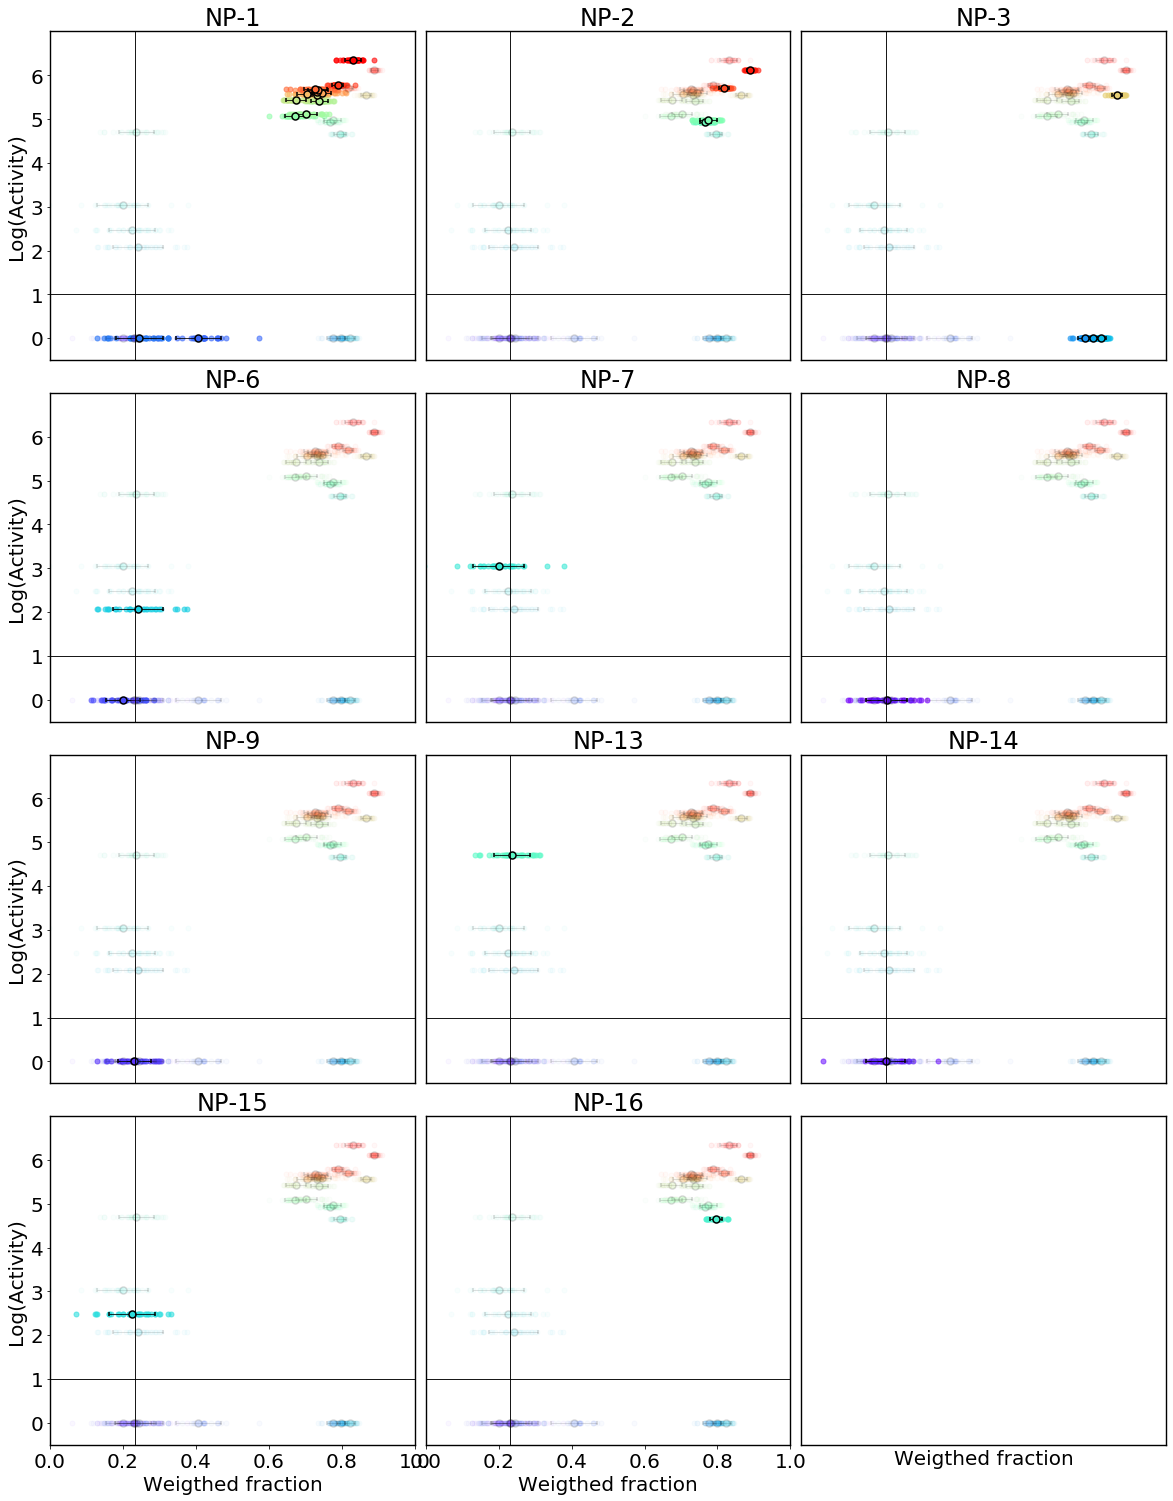

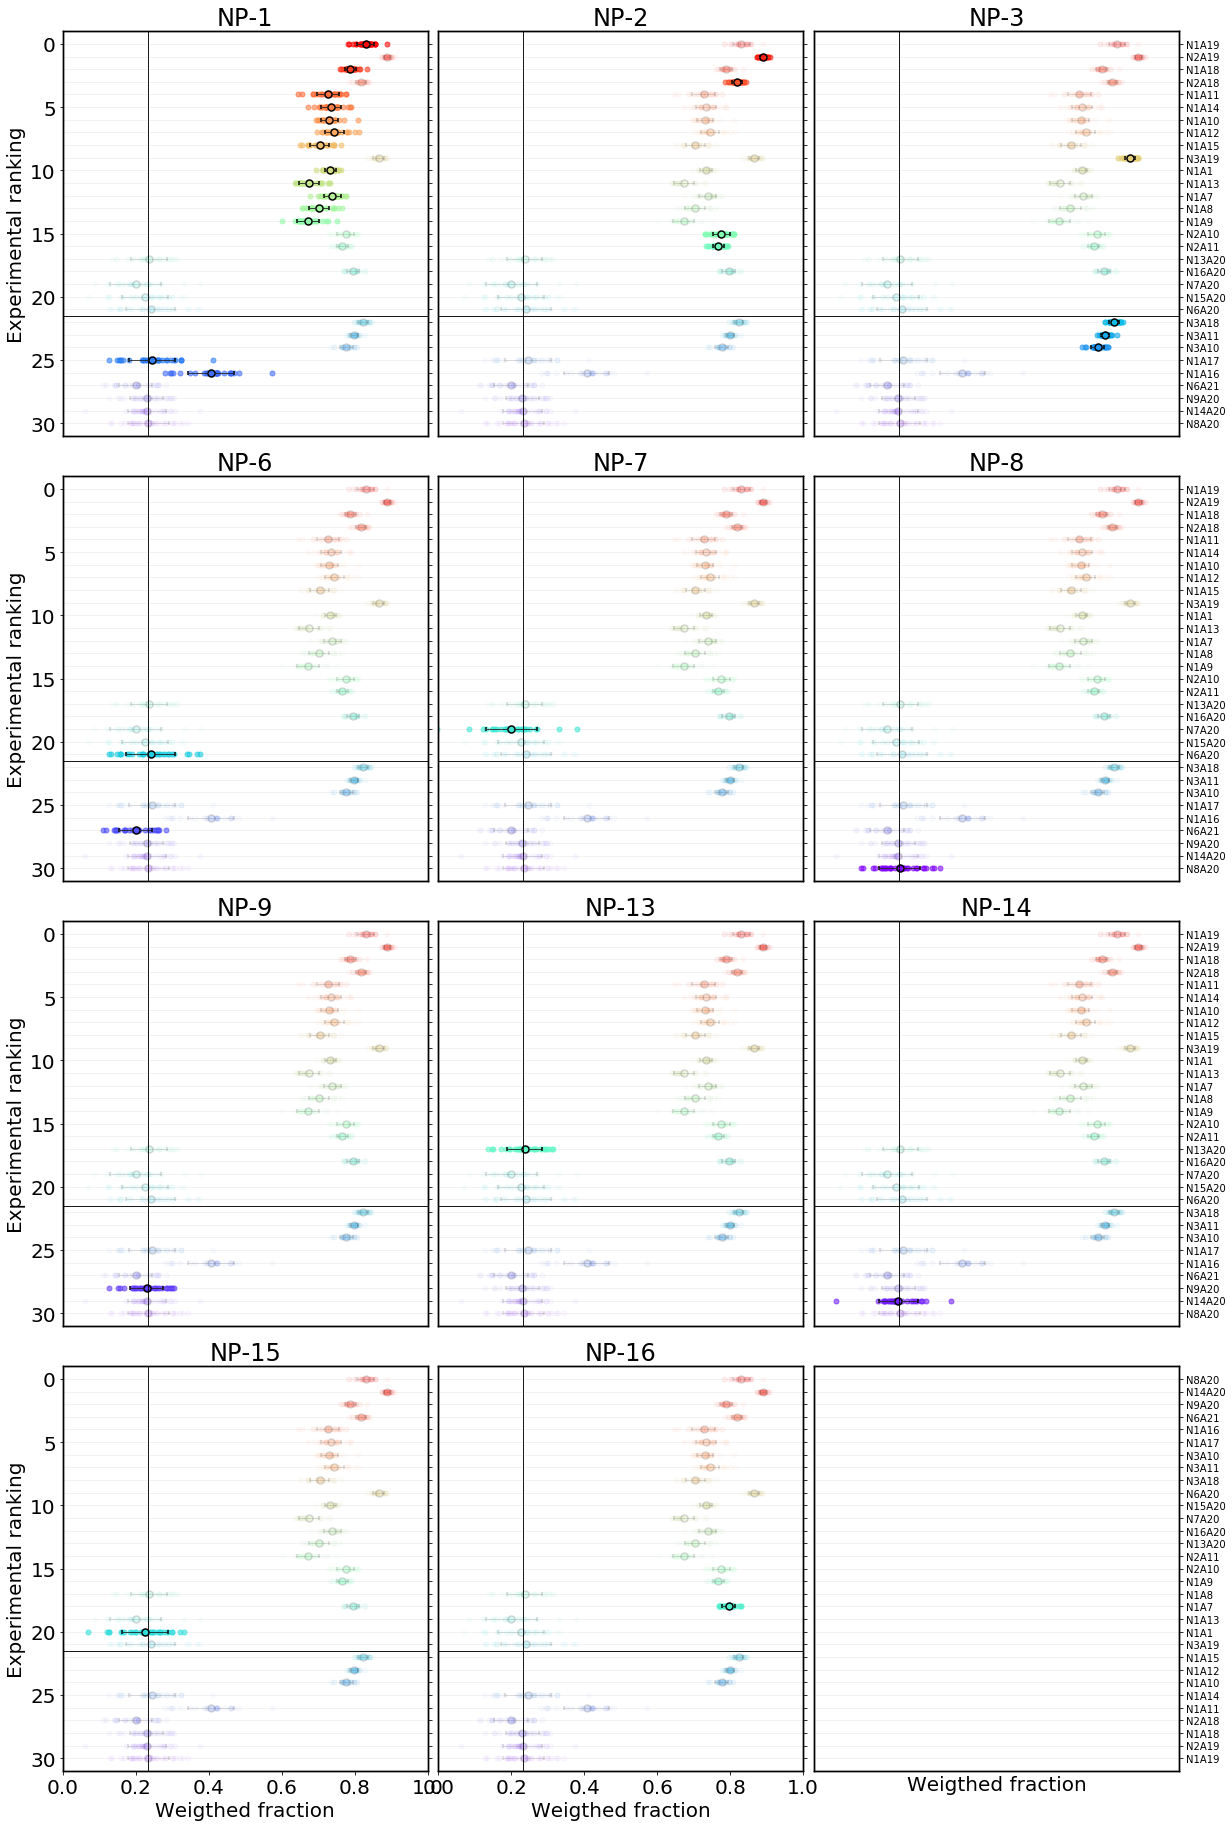

In [18]:
pp.plot_np_dependence(best_j, data=DATA, kwargs=inp.kwargs)
pp.plot_np_dependence_rank(best_j, data=DATA, kwargs=inp.kwargs)

# Analytes

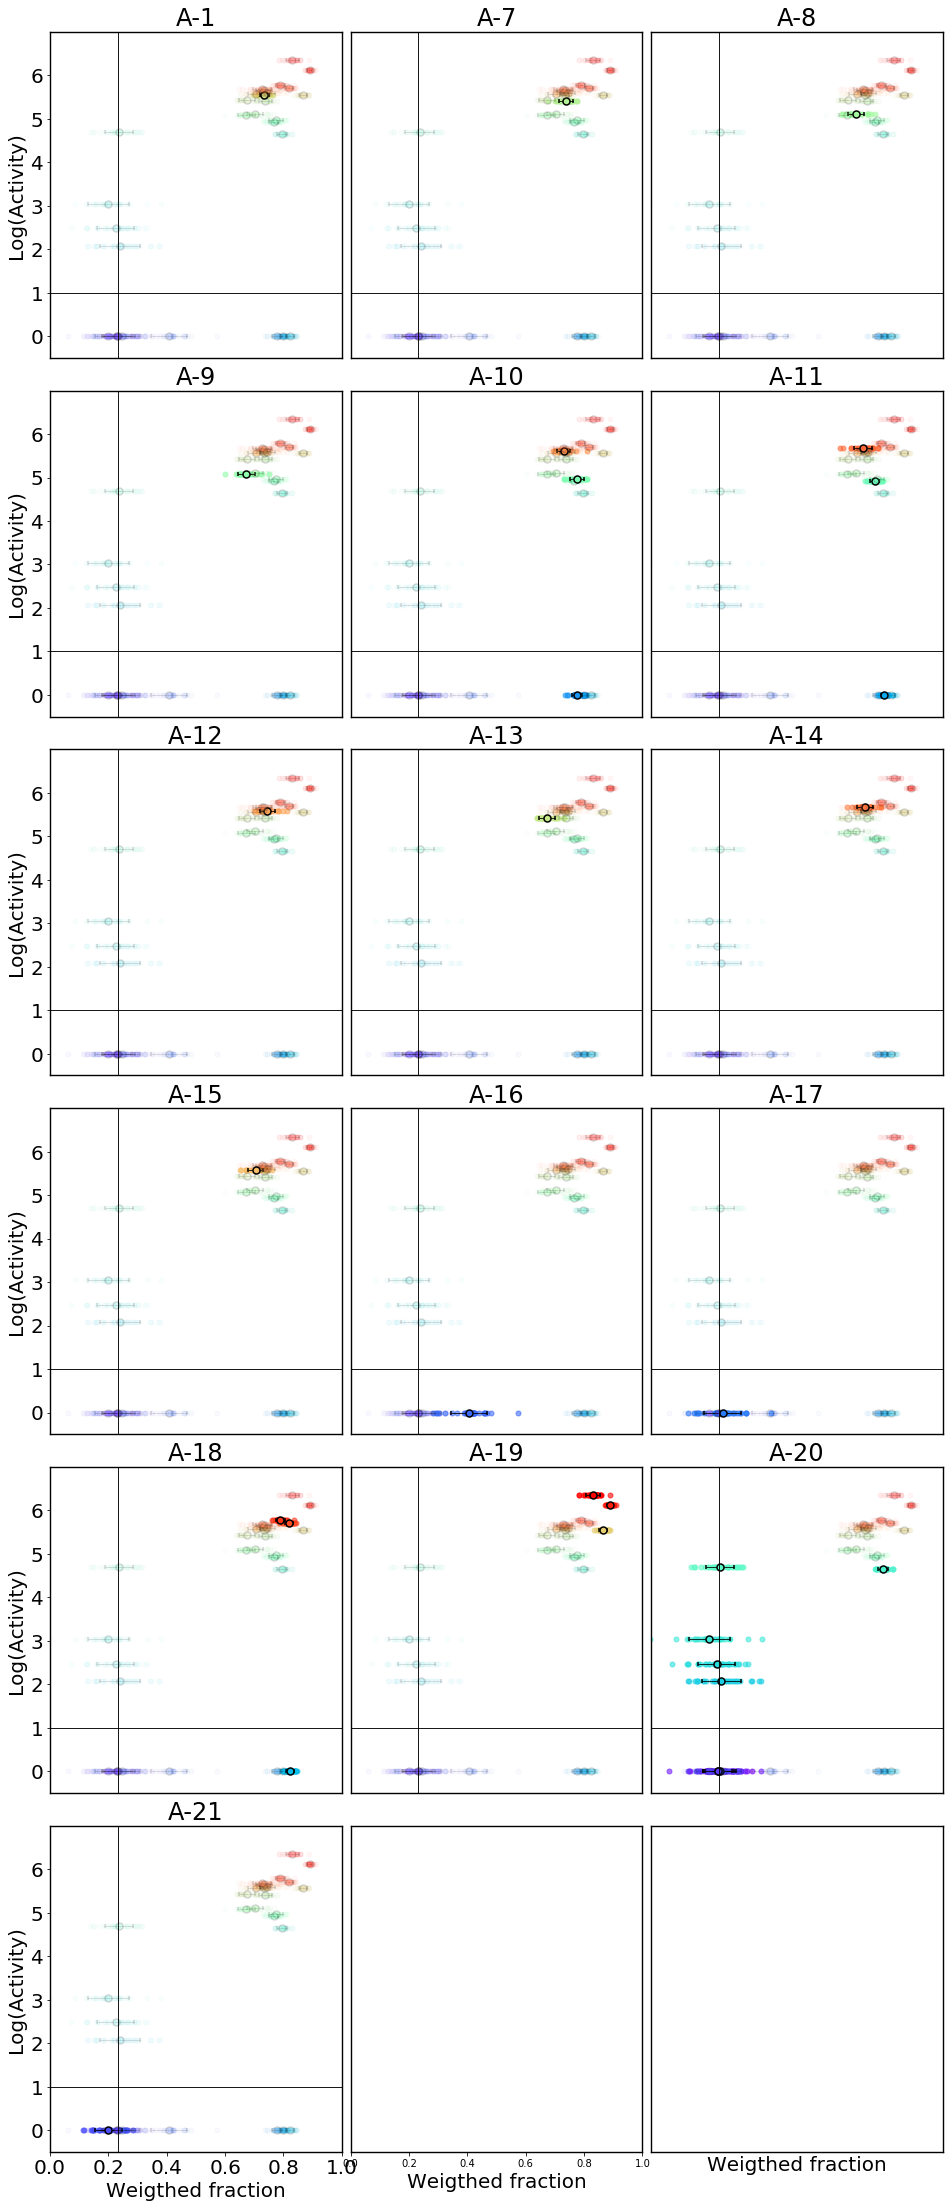

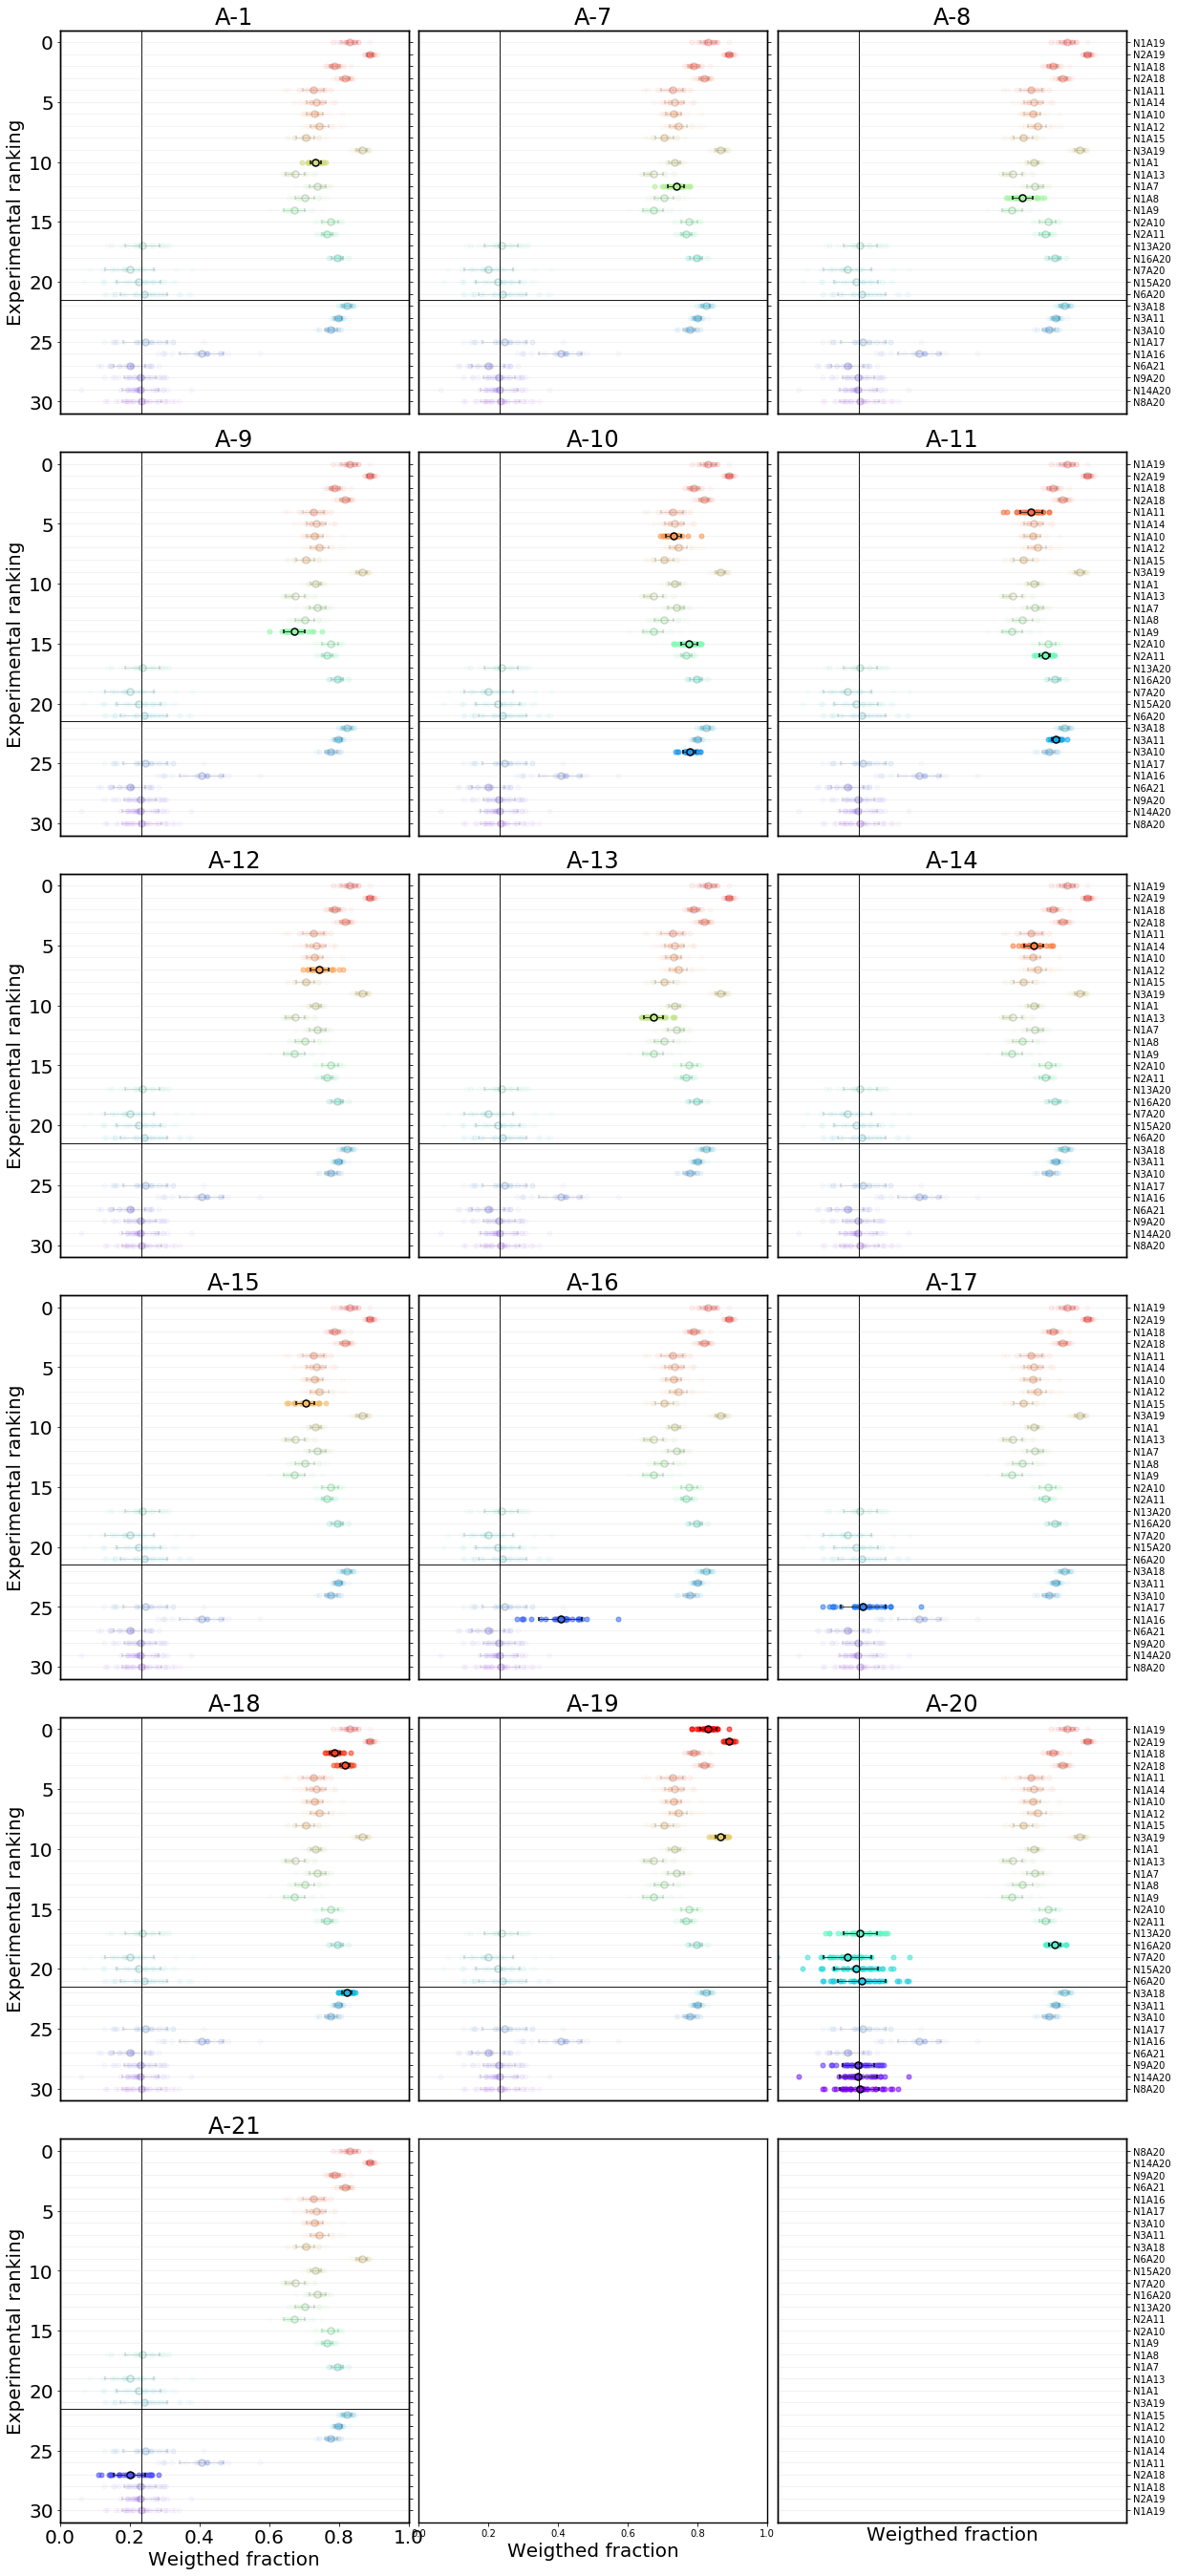

In [19]:
pp.plot_an_dependence(best_j, data=DATA, kwargs=inp.kwargs)
pp.plot_an_dependence_rank(best_j, data=DATA, kwargs=inp.kwargs)

# Charge/PEG

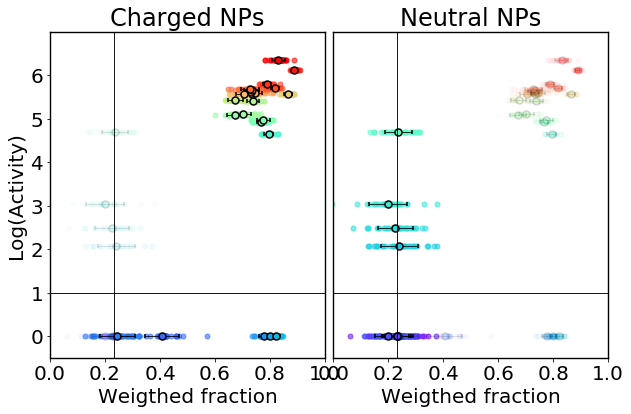

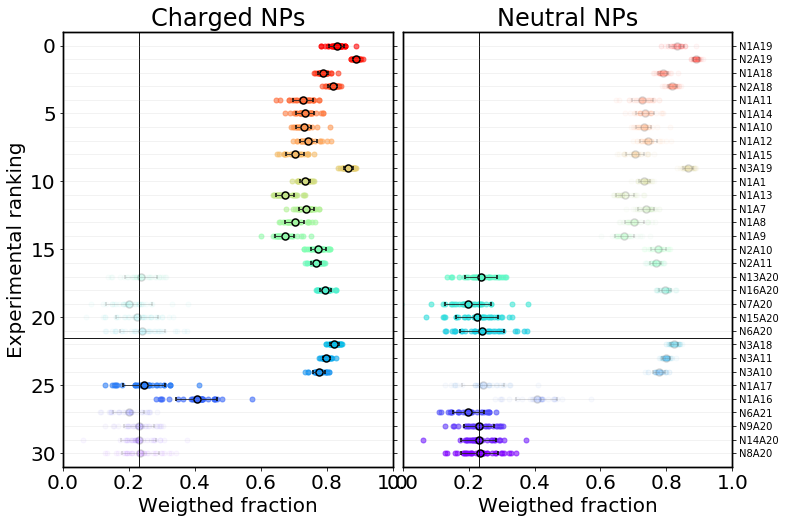

In [20]:
pp.plot_npcharge_dependence(best_j, data=DATA, kwargs=inp.kwargs)
pp.plot_npcharge_dependence_rank(best_j, data=DATA, kwargs=inp.kwargs)

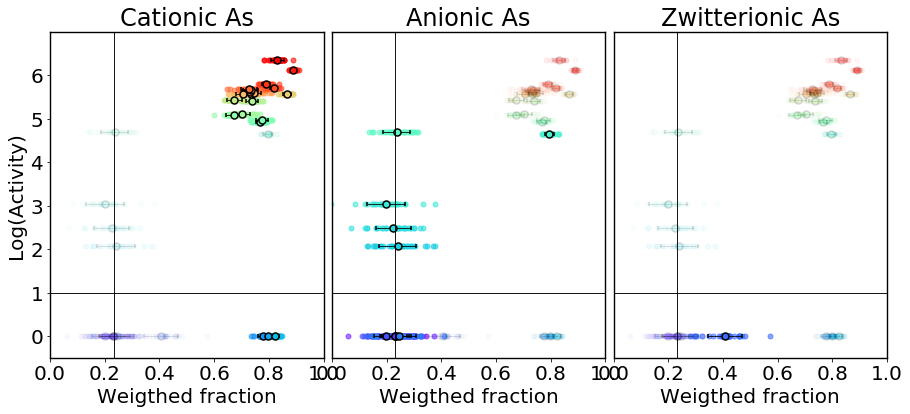

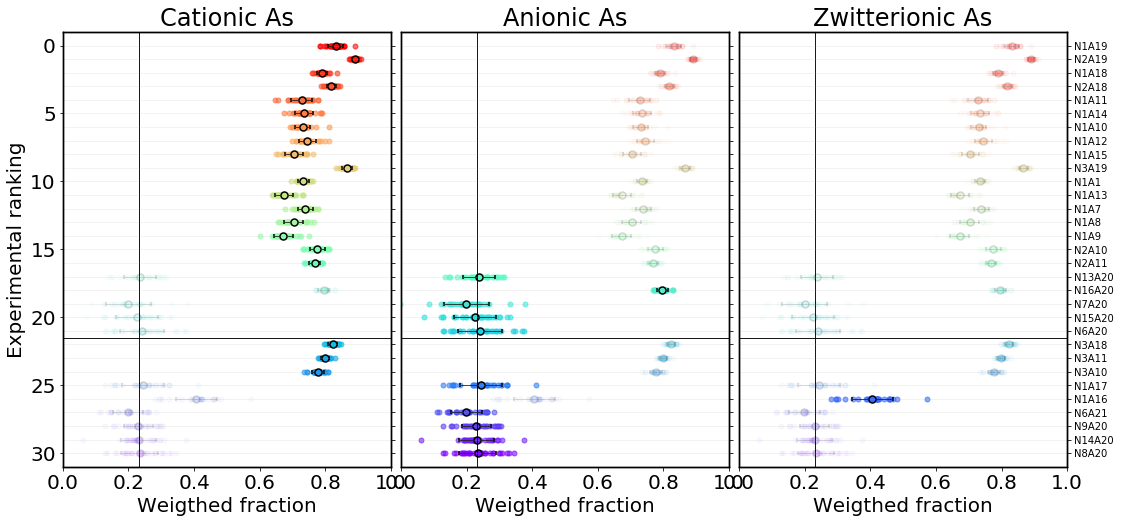

In [21]:
pp.plot_ancharge_dependence(best_j, data=DATA, kwargs=inp.kwargs)
pp.plot_ancharge_dependence_rank(best_j, data=DATA, kwargs=inp.kwargs)

# Bind/Unbind sets

In [30]:
from importlib import reload

In [53]:
reload(pp)

<module 'DEPENDENCIES.plot_performance' from 'C:\\Users\\fsebastian\\Documents\\PhD\\Data\\ThiolScreening\\Mixtures\\DEPENDENCIES\\plot_performance.py'>

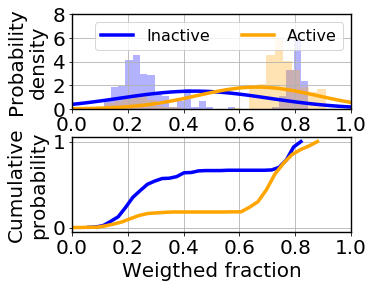

In [54]:
pp.plot_distributions(inp.j_space, bind_scores, unbind_scores, kwargs=inp.kwargs)

# Tree analysis

In [23]:
ml_cols = ['Score', 'Rog_Mean', 'Sasa_Mean', 'NP_lonepairs', 'NP_hydrogens', 'NP_pcharges', 'NP_ncharges', 'NP_arrings', 'A_lonepairs', 'A_hydrogens', 'A_pcharges', 'A_ncharges', 'A_arrings']
X_set = pd.DataFrame(zip(DATA.Score.apply(np.mean), DATA['Rog_Mean'], DATA['Sasa_Mean'], np_lonepairs, np_hydrogens, np_pcharges, np_ncharges, np_arrings, a_lonepairs, a_hydrogens, a_pcharges, a_ncharges, a_arrings), columns=ml_cols, index=Systems)
Y_set = DATA.Active.astype(int)
ml_set = X_set.join(Y_set)

In [24]:
ml_set

,Score,Rog_Mean,Sasa_Mean,NP_lonepairs,NP_hydrogens,NP_pcharges,NP_ncharges,NP_arrings,A_lonepairs,A_hydrogens,A_pcharges,A_ncharges,A_arrings,Active
N8A20,0.234416,1.222270,117.607711,10,1,0,0,0,7,1,0,1,1,0
N14A20,0.230908,1.229346,122.534396,10,1,0,0,0,7,1,0,1,1,0
N9A20,0.230299,1.234890,131.365727,10,2,0,0,0,7,1,0,1,1,0
N6A21,0.199562,1.196819,113.183837,8,1,0,0,0,6,1,0,1,1,0
N1A16,0.406442,1.154348,111.985301,7,0,0,1,0,5,3,1,1,1,0
N1A17,0.244813,1.159722,113.355325,7,0,0,1,0,7,1,0,1,1,0
N3A10,0.777128,1.258189,129.563886,9,1,0,1,1,2,3,1,0,1,0
N3A11,0.798521,1.257991,131.776913,9,1,0,1,1,2,3,1,0,1,0
N3A18,0.822767,1.255919,131.478612,9,1,0,1,1,0,3,1,0,2,0
N6A20,0.240840,1.201595,116.258667,8,1,0,0,0,7,1,0,1,1,1


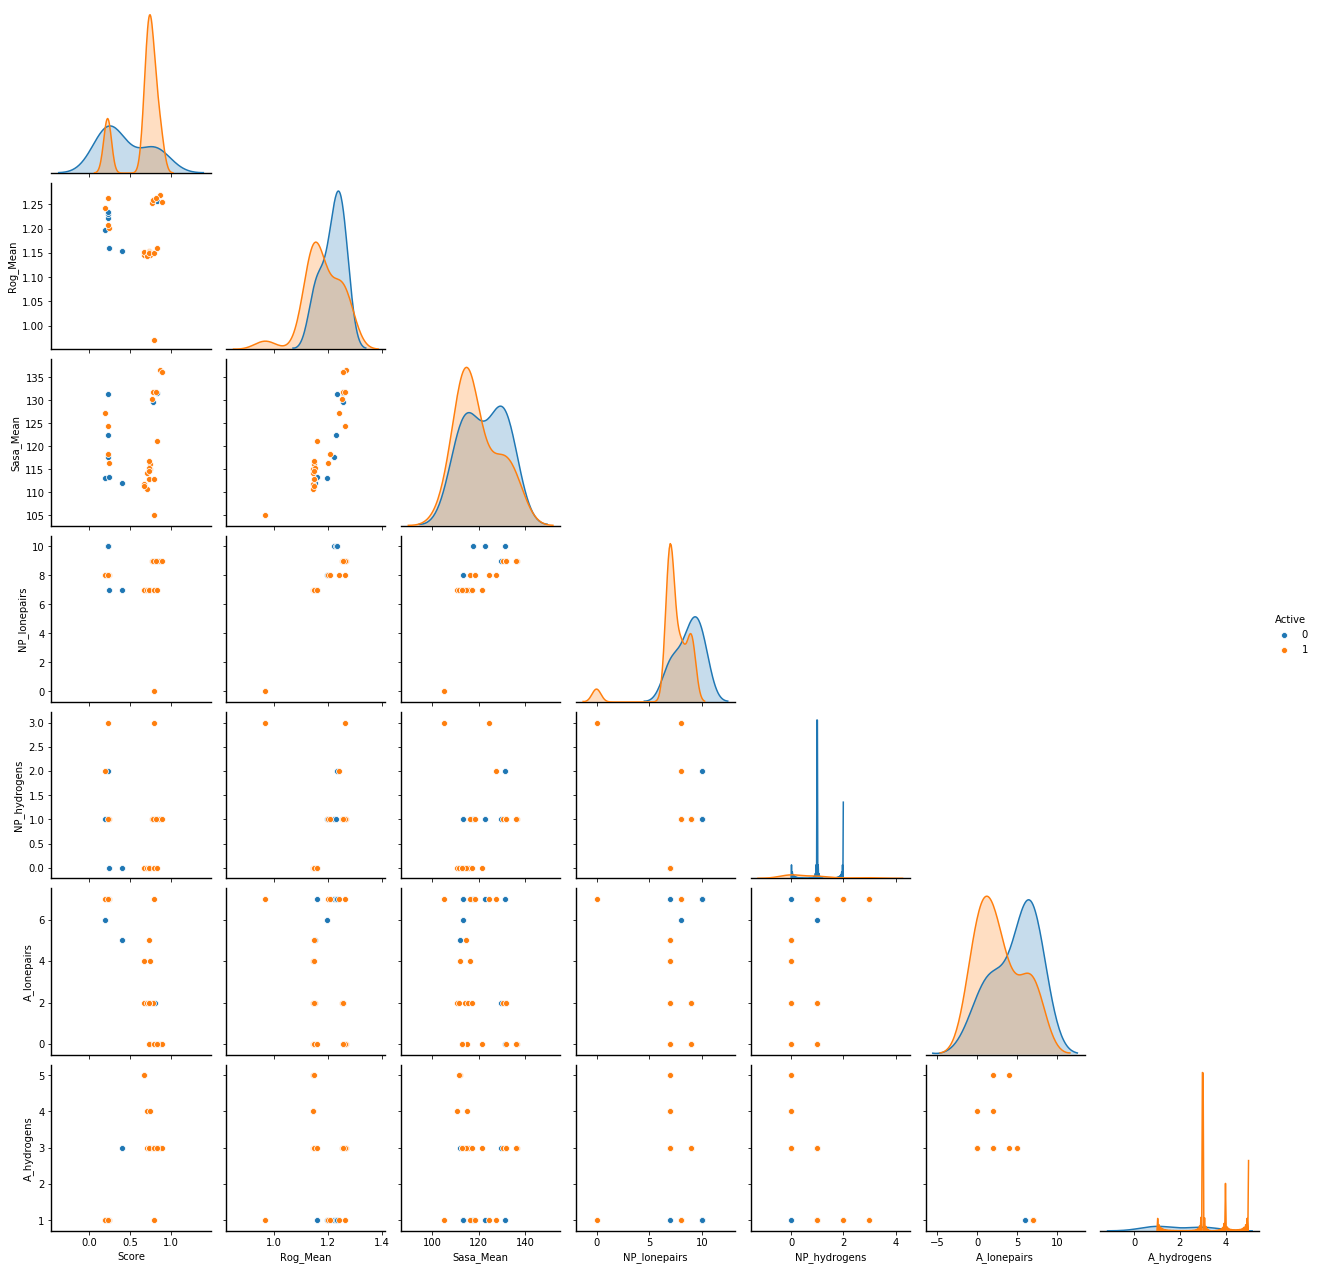

In [25]:
g = sns.pairplot(ml_set, hue='Active', x_vars=['Score', 'Rog_Mean', 'Sasa_Mean', 'NP_lonepairs', 'NP_hydrogens', 'A_lonepairs', 'A_hydrogens'], y_vars=['Score', 'Rog_Mean', 'Sasa_Mean', 'NP_lonepairs', 'NP_hydrogens', 'A_lonepairs', 'A_hydrogens'], corner=True)

Accuracy: 0.84
Sensitivity: 0.91
Specificity: 0.67


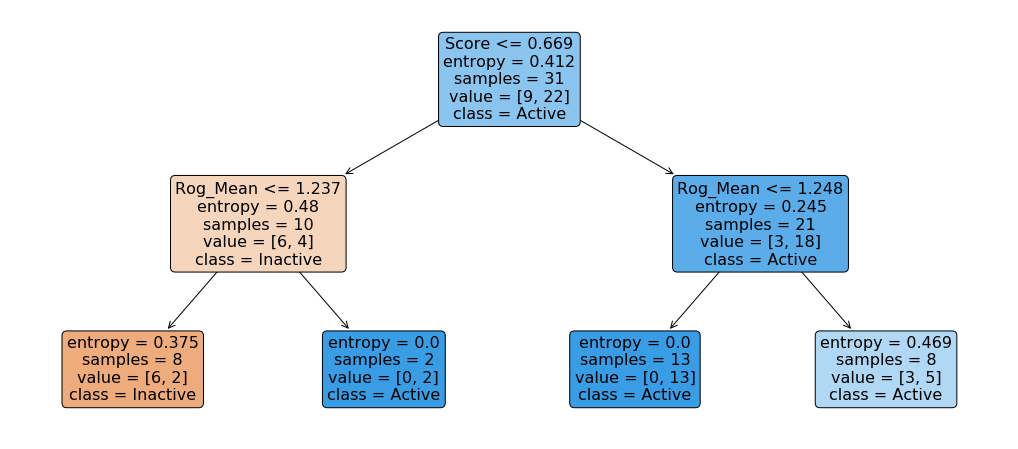

In [26]:
dt = tc.find_best_tree(X_set, Y_set, max_depth=2)
tc.plot_my_tree(dt, ml_cols)

Accuracy: 0.84
Sensitivity: 0.87
Specificity: 0.75


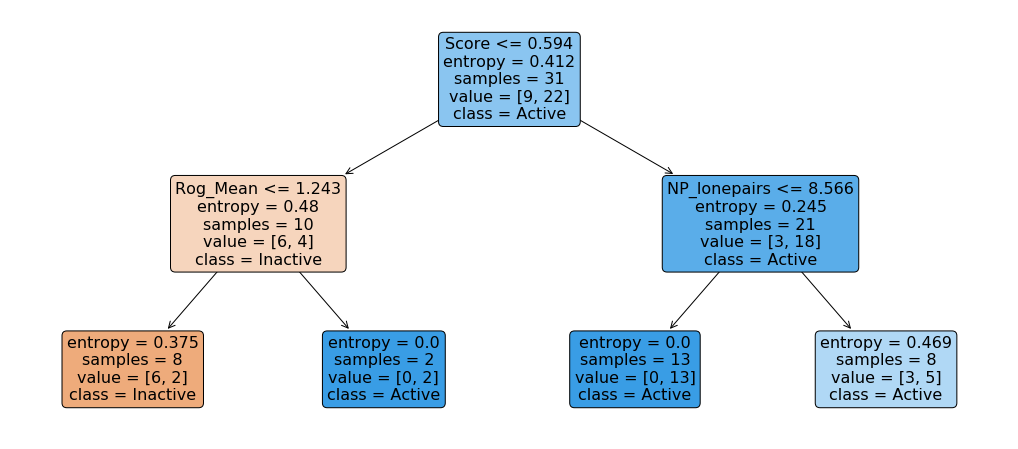

In [27]:
dt = tc.find_best_tree_with_score(X_set, Y_set, max_depth=2)
tc.plot_my_tree(dt, ml_cols)

In [28]:
DATA[DATA.Nanoparticle==2]

,Nanoparticle,Analyte,Act_Mean,Act_Std,Act_Rank,Act_Rank_Std_up,Act_Rank_Std_down,Act_log,Act_log_error_up,Act_log_error_down,Color,Active,Distances,Rogs,Rog_Mean,Rog_Std,Sasas,Sasa_Mean,Sasa_Std,Score
System,,,,,,,,,,,,,,,,,,,,
N2A11,2,11,85000.0,15000.0,16,2,0,4.929419,0.070581,0.084321,"[0.43, 0.99, 0.74, 1.0]",True,"[[1.51, 1.556, 1.58, 1.532, 1.528, 1.59, 1.534...","[1.4094966666666668, 1.4064466666666668, 1.406...",1.252882,0.018337,"[243.946, 243.6483333333333, 244.242, 243.7686...",130.365037,5.999999,"[0.7531097086040068, 0.7689802834747715, 0.770..."
N2A10,2,10,93000.0,12000.0,15,1,1,4.968483,0.052706,0.059998,"[0.5, 1.0, 0.7, 1.0]",True,"[[1.527, 1.512, 1.548, 1.562, 1.538, 1.59, 1.5...","[1.4088133333333335, 1.4055100000000003, 1.404...",1.258166,0.015763,"[243.461, 241.028, 240.52566666666667, 240.438...",131.815600,5.025483,"[0.8072700794307601, 0.7442830675731739, 0.811..."
N2A18,2,18,510000.0,30000.0,3,1,1,5.707570,0.024824,0.026329,"[1.0, 0.3, 0.15, 1.0]",True,"[[1.52, 1.549, 1.571, 1.562, 1.576, 1.537, 1.5...","[1.4089966666666667, 1.40637, 1.40523000000000...",1.262677,0.016195,"[244.74800000000002, 242.756, 241.693666666666...",131.733799,6.073385,"[0.8217654654611622, 0.8168052212085609, 0.843..."
N2A19,2,19,1300000.0,100000.0,1,0,0,6.113943,0.032185,0.034762,"[1.0, 0.1, 0.05, 1.0]",True,"[[1.576, 1.563, 1.525, 1.523, 1.532, 1.573, 1....","[1.4088033333333334, 1.4062399999999997, 1.405...",1.255181,0.017675,"[242.94733333333332, 241.69500000000002, 242.0...",136.116618,7.266411,"[0.8850148010906522, 0.8930632897926366, 0.880..."
